<a href="https://colab.research.google.com/github/aiswarya-sureshkumar/Customer-Churn-Prediction-using-FNN/blob/main/Customer_Churn_Prediction_using_FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df['Geography'].value_counts

<bound method IndexOpsMixin.value_counts of 0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object>

<Axes: xlabel='Geography', ylabel='count'>

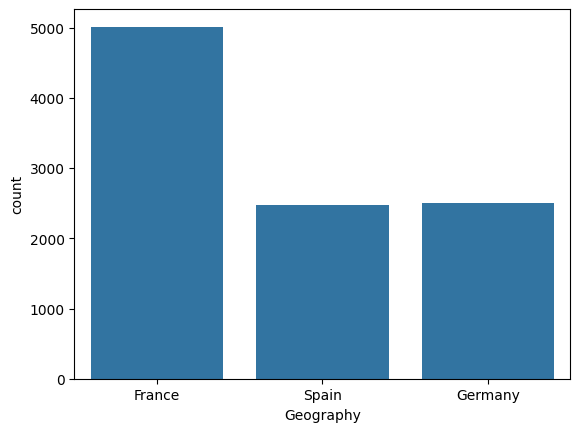

In [10]:
sns.countplot(x=df['Geography'])

In [11]:
df['Gender'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object>

<Axes: xlabel='Gender', ylabel='count'>

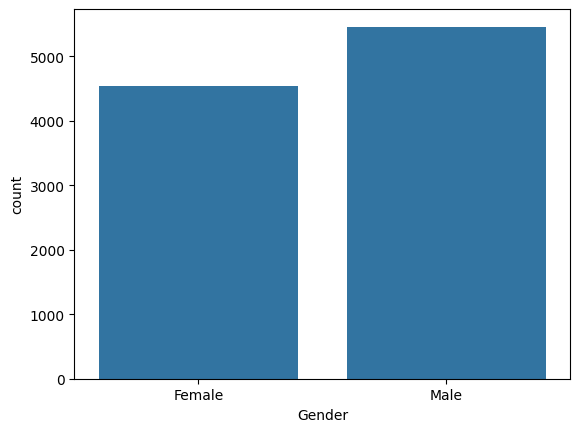

In [12]:
sns.countplot(x=df['Gender'])

In [13]:
df['Exited'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64>

<Axes: xlabel='Exited', ylabel='count'>

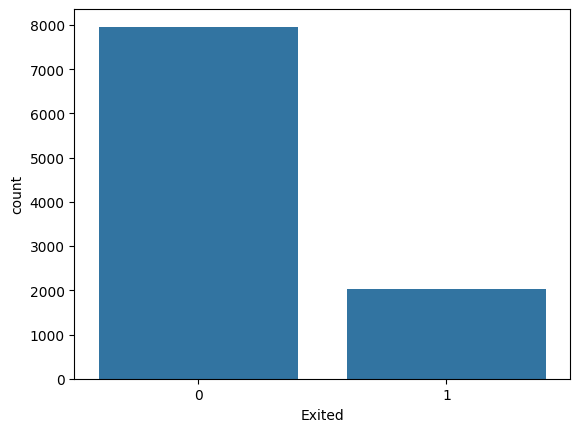

In [14]:
sns.countplot(x=df['Exited'])

In [15]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [16]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [17]:
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [18]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [19]:
x=df.drop(columns=['Exited'])
y=df['Exited']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [22]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(x_train_scaled,y_train)

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [28]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 22)                264       
                                                                 
 dense_7 (Dense)             (None, 22)                506       
                                                                 
 dense_8 (Dense)             (None, 11)                253       
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 1167 (4.56 KB)
Trainable params: 1167 (4.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [31]:
history=model.fit(x_train_scaled,y_train,batch_size=32,epochs=300,validation_split=0.20)

Epoch 1/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5982 - accuracy: 0.7812 - val_loss: 0.5276 - val_accuracy: 0.7987
Epoch 2/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5101 - accuracy: 0.7934 - val_loss: 0.4906 - val_accuracy: 0.7987
Epoch 3/300
200/200 [==============================] - 1s 4ms/step - loss: 0.4954 - accuracy: 0.7934 - val_loss: 0.4821 - val_accuracy: 0.7987
Epoch 4/300
200/200 [==============================] - 1s 4ms/step - loss: 0.4874 - accuracy: 0.7934 - val_loss: 0.4730 - val_accuracy: 0.7987
Epoch 5/300
200/200 [==============================] - 1s 3ms/step - loss: 0.4788 - accuracy: 0.7934 - val_loss: 0.4645 - val_accuracy: 0.7987
Epoch 6/300
200/200 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7934 - val_loss: 0.4565 - val_accuracy: 0.7987
Epoch 7/300
200/200 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7934 - val_loss: 0.4500 - val_accuracy: 0.7987

In [32]:
model.layers[0].get_weights()

[array([[-0.14530632,  0.33076215, -0.4371207 ,  0.3292801 , -0.415176  ,
          0.15653197,  0.37691116, -0.06249342,  0.06713903, -0.47196284,
          0.39478642],
        [-0.8936607 , -0.40725967, -0.6247759 , -0.4174909 , -0.7079378 ,
         -0.6548896 ,  0.5630409 , -0.06273855, -0.10366142,  0.28582305,
          0.48340335],
        [ 0.23861095,  0.14108796, -0.15476859,  0.06196202,  0.25427166,
          0.05896118,  0.22047465,  0.00721316, -0.00210892, -0.54304904,
          0.41973785],
        [-0.57319736, -0.43536463,  0.0254268 ,  0.4122854 ,  0.40031213,
          0.15231217,  0.00821429,  0.33050787, -0.09588736,  0.0177717 ,
         -0.19026826],
        [-0.08162597, -0.35379872,  0.21752474, -0.16131775, -0.32153863,
          0.15308496,  0.43669224,  0.9225084 , -1.1164107 , -0.30612865,
         -0.29711884],
        [-0.27641153, -0.21285352,  0.02722869,  0.08402003,  0.46289364,
         -0.10137064,  0.02547553, -0.04774448,  0.07605856, -0.1733133

In [33]:
model.layers[1].get_weights()

[array([[-0.14287034, -0.39655414, -0.01312582, -0.1608771 ,  0.30197275,
          0.23512821, -0.2608783 , -0.2981932 ,  0.1704225 , -0.55846006,
         -0.04031224,  0.40977964,  0.51568973,  0.47814277,  0.41493702,
         -0.07183217,  0.21232234, -0.04422054,  0.08123289, -0.30431783,
         -0.02139577, -0.32260975],
        [-0.15650773,  0.13242622,  0.31529287,  0.3071705 , -0.4009464 ,
         -0.04224654, -0.5986665 ,  0.42076215,  0.3057985 , -0.36330414,
          0.09604772, -0.32184708, -0.3277066 ,  0.46898672,  0.42158556,
          0.41308835,  0.17466506,  0.16600838, -0.07707198,  0.33113644,
          0.1566485 , -0.23447478],
        [-0.02244618,  0.31809545,  0.5504124 , -0.09370894,  0.41155386,
         -0.22336349, -0.12232348,  0.02658638, -0.206836  ,  0.60360056,
          0.06290739, -0.04489731, -0.02547828,  0.17904082,  0.16894184,
          0.4959071 , -0.01067143,  0.26442644,  0.4871343 , -0.33007753,
          0.03191349,  0.3617244 ],
    

In [34]:
model.layers[2].get_weights()

[array([[ 0.11925942,  0.21769   ,  0.3536447 , -0.38720757,  0.18091697,
         -0.2308644 ,  0.36683005,  0.28324863,  0.10636641,  0.08764697,
          0.29172283,  0.2936432 ,  0.3171412 , -0.19408205,  0.26175985,
          0.22339442,  0.11017273,  0.10604643, -0.13530125,  0.38826147,
          0.13385798, -0.16889776],
        [ 0.22543032, -0.4048489 ,  0.4856976 , -0.04066419, -0.11699415,
         -0.35800245, -0.07080277,  0.15483059,  0.3528992 ,  0.18649745,
         -0.25670618,  0.0394154 , -0.4416732 ,  0.25656897, -0.27138084,
         -0.18924516,  0.2124102 , -0.22520202,  0.2026932 , -0.16420324,
         -0.1532801 ,  0.31482604],
        [-0.27311286,  0.1263614 ,  0.3372819 ,  0.19383861,  0.22103745,
          0.18938677, -0.00933081, -0.39689243,  0.2286847 , -0.10555813,
          0.3788295 ,  0.16009508, -0.1565207 ,  0.43427238, -0.17597304,
         -0.25807157, -0.2047894 ,  0.26604387, -0.5119751 ,  0.4135888 ,
         -0.00825301,  0.26861644],
    

In [35]:
y_log=model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [36]:
y_pred=np.where(y_log>0.5,1,0)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.848

In [38]:
history.history

{'loss': [0.5981624126434326,
  0.5101235508918762,
  0.49542713165283203,
  0.48741501569747925,
  0.4788479506969452,
  0.47078990936279297,
  0.46365585923194885,
  0.4573596119880676,
  0.4514991343021393,
  0.4473426342010498,
  0.4432651102542877,
  0.43957653641700745,
  0.4364855885505676,
  0.4333377778530121,
  0.4306492507457733,
  0.428080677986145,
  0.4256034195423126,
  0.423299640417099,
  0.42134758830070496,
  0.4193364679813385,
  0.41715148091316223,
  0.41478508710861206,
  0.41219618916511536,
  0.40954726934432983,
  0.4061926007270813,
  0.4023323059082031,
  0.39809951186180115,
  0.39327535033226013,
  0.38766318559646606,
  0.38128456473350525,
  0.37520885467529297,
  0.36904194951057434,
  0.3631516396999359,
  0.358733594417572,
  0.3549785315990448,
  0.3519479036331177,
  0.3498460352420807,
  0.34742680191993713,
  0.3461187779903412,
  0.3447255790233612,
  0.34401488304138184,
  0.34261298179626465,
  0.34200868010520935,
  0.34134387969970703,
  0.34

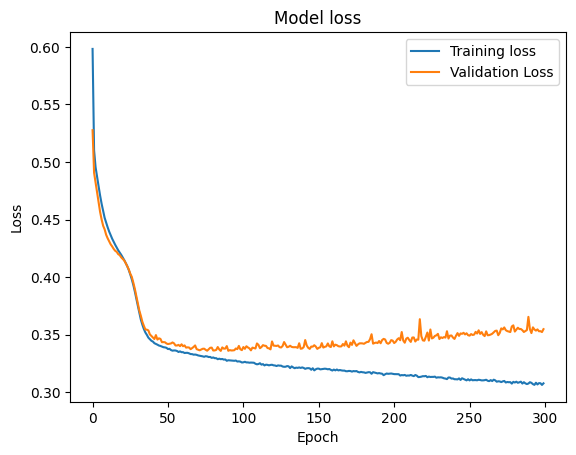

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss','Validation Loss'])
plt.show()

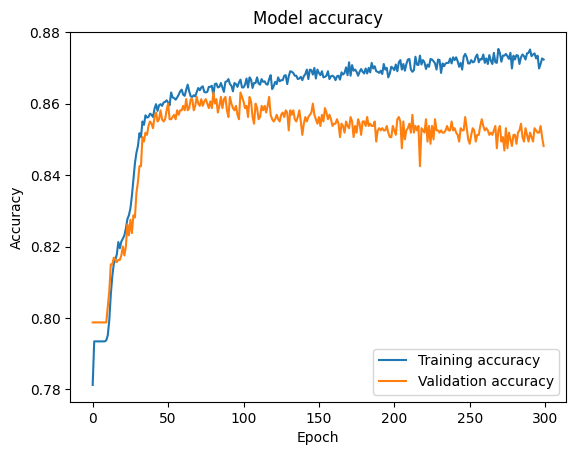

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy','Validation accuracy'])
plt.show()